In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import glob
import time
from helperfunctions import *
from svmclassifier import *

In [2]:
# Read training data 
# Car
cars_files    = glob.glob('C://big/p5/vehicles/**/*.png', recursive=True)
# Not Car
notcars_files = glob.glob('C://big/p5/non-vehicles/**/*.png', recursive=True)

# store filenames in cars,notcars
cars=[]
notcars=[]
# search through readed data 
# read every third image to split time-series of images
for n in range(len(cars_files)):
    if n % 3 == 0:
        cars.append(cars_files[n])
#print(cars)

# Do the same for non-car data
for n in range(len(notcars_files)):
    if n % 3 == 0:
        notcars.append(notcars_files[n])
        
print('Cars size is: ',np.shape(cars))
print('Not-Cars size is: ',np.shape(notcars))

Cars size is:  (2931,)
Not-Cars size is:  (2990,)


In [9]:
image = mpimg.imread('media/test_images/test6.jpg')

get_hog_features(image, 9,8,8)

C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


ValueError: The parameter `image` must be a 2-dimensional array

In [3]:
# Testing functions above - pickle_extracted_features()
cspace ='RGB'
orient = 9
pix_per_cell = 4
cell_per_block = 2 
hog_channel = 'ALL'

# Extract the features, then save a pickle file
fname = 'X_scaler_scaled_X_y.p'
if os.path.isfile(fname) == True:
    print('Already Extracted, got my pickle')
    pass
else:
    pickle_extracted_features('X_scaler_scaled_X_y.p',cars,notcars,cspace,orient,
                          pix_per_cell,cell_per_block,hog_channel)

# Test training_with_SVM()
training_with_SVM('X_scaler_scaled_X_y.p')

Already Extracted, got my pickle
6.26 Seconds to train SVC
Test Accuracy of SVC =  0.9668
Model saved as [ svc.pickle ] file
My SVC predictions: 
 [ 0.  0.  1.  1.  1.  0.  0.  1.  1.  0.]
For  10 labels: 
 [ 0.  0.  1.  1.  1.  0.  0.  1.  1.  0.]


find cars cspace is  RGB
(720, 1280, 3)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


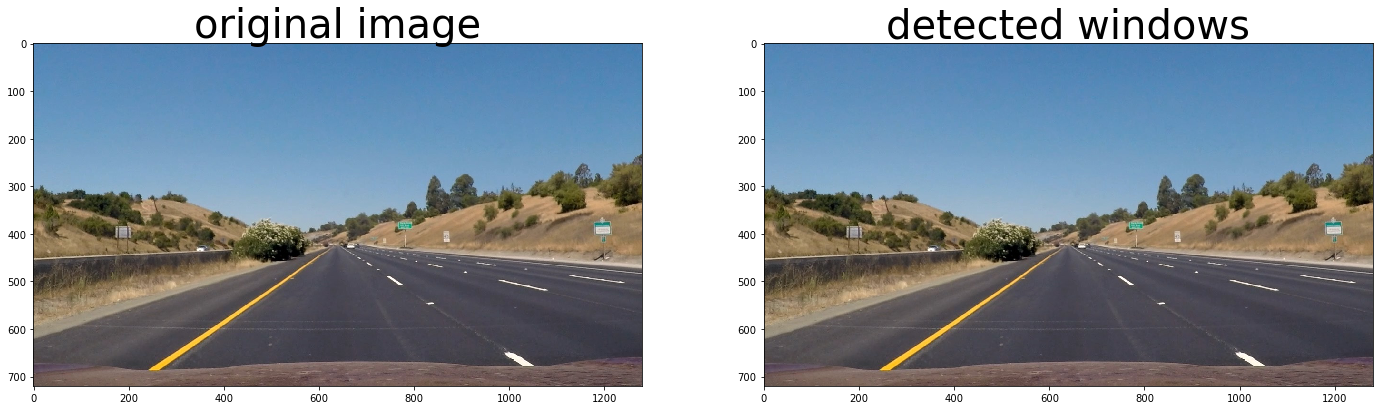

find cars cspace is  RGB
(720, 1280, 3)


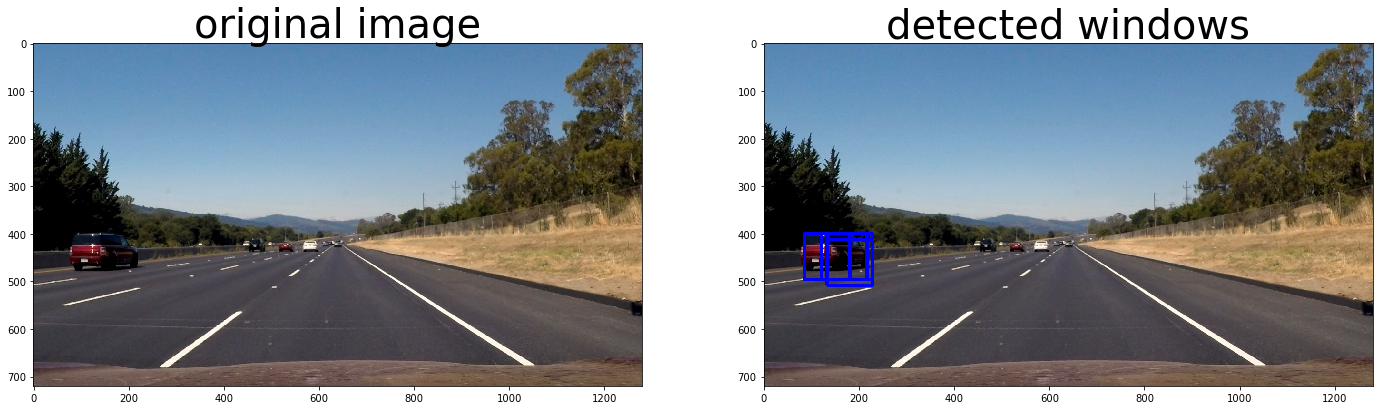

find cars cspace is  RGB
(720, 1280, 3)


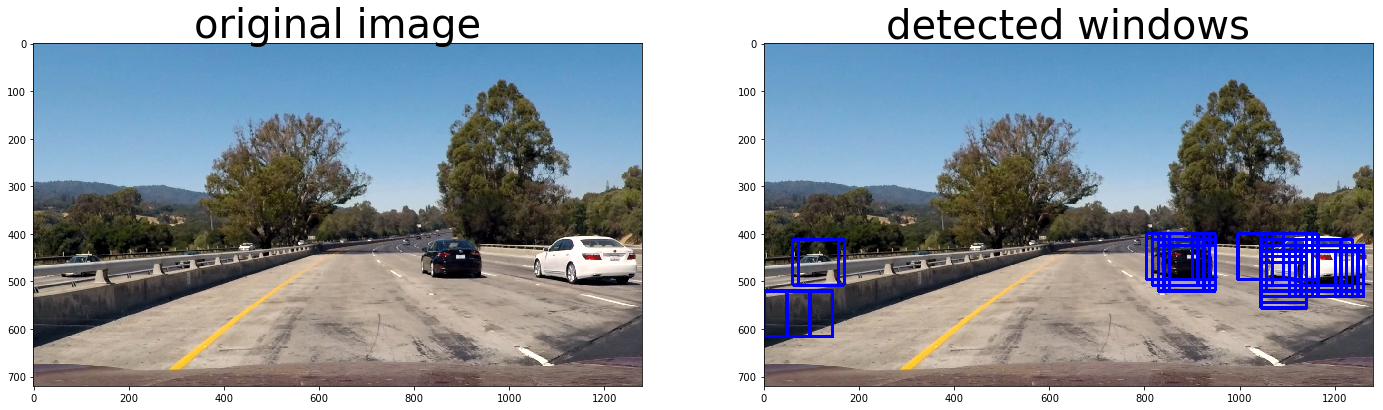

find cars cspace is  RGB
(720, 1280, 3)


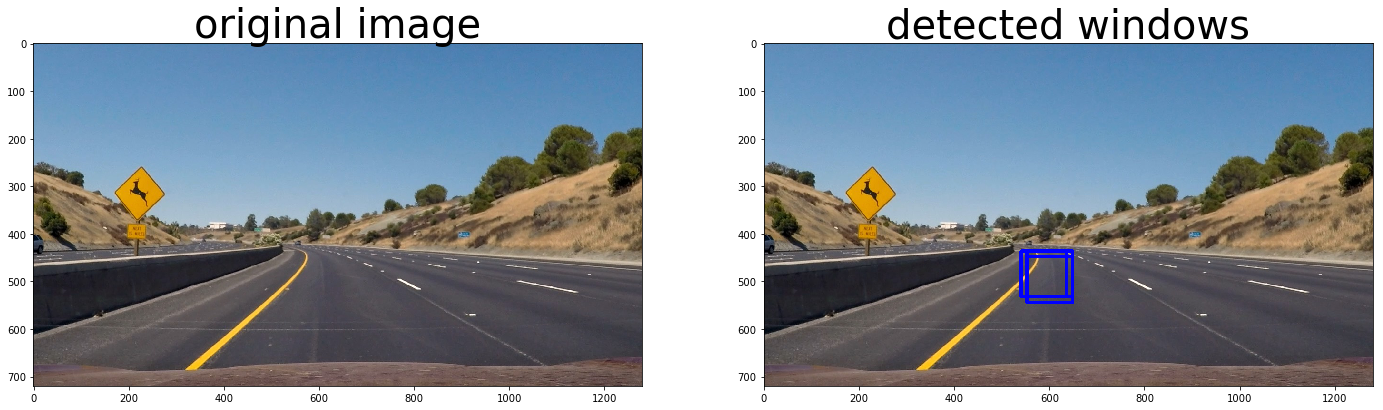

find cars cspace is  RGB
(720, 1280, 3)


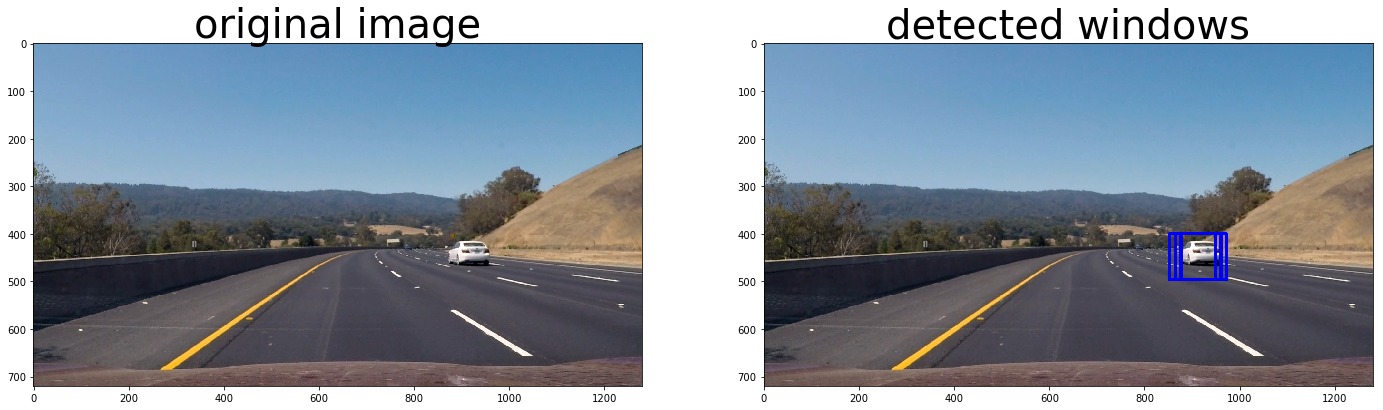

find cars cspace is  RGB
(720, 1280, 3)


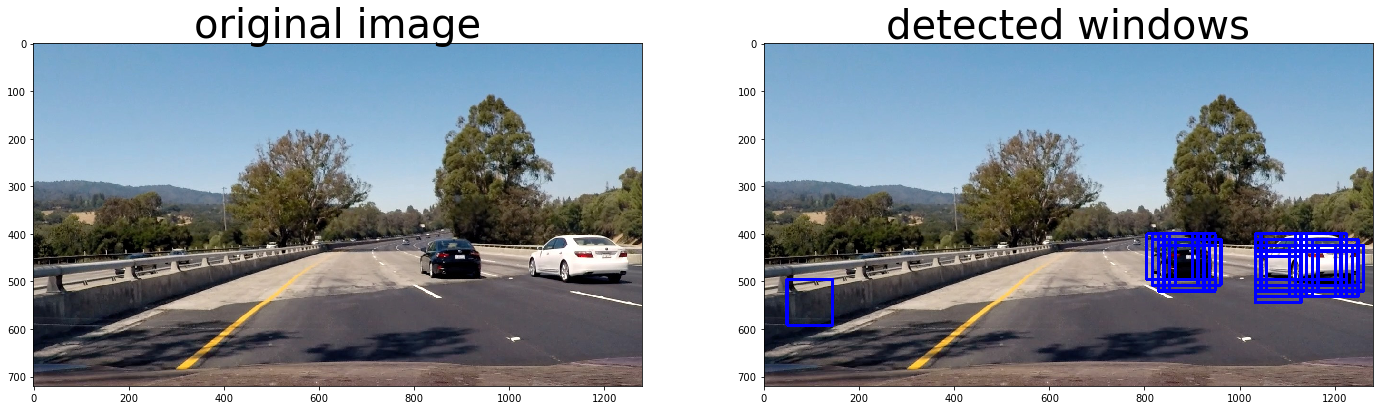

find cars cspace is  RGB
(720, 1280, 3)


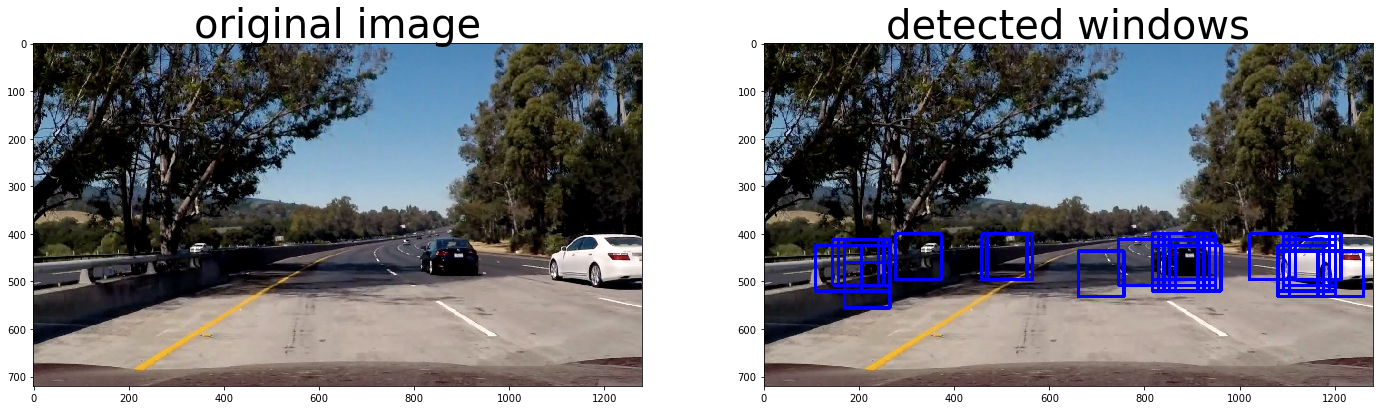

find cars cspace is  RGB
(720, 1280, 3)


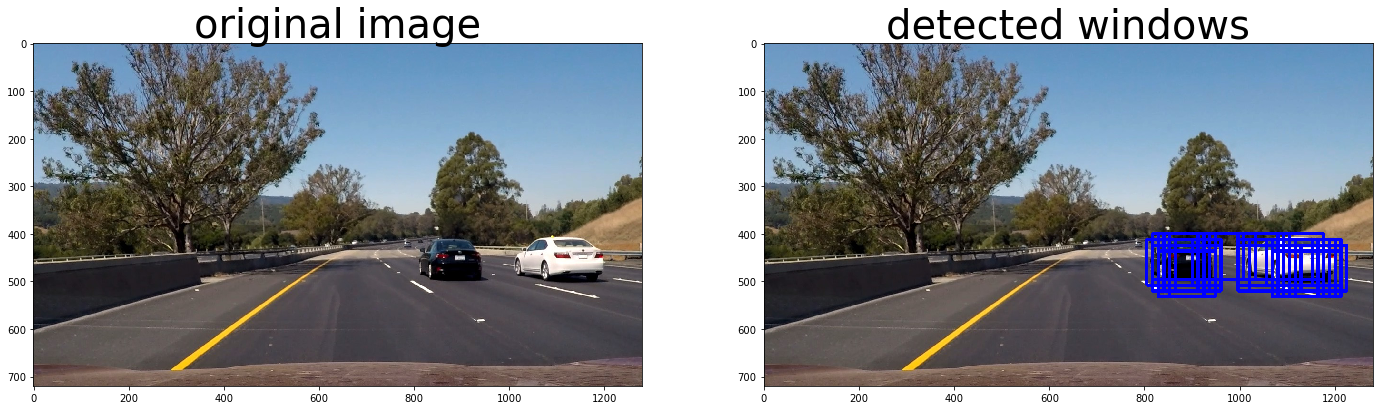

done
[((804, 412), (900, 508)), ((816, 400), (912, 496)), ((816, 412), (912, 508)), ((816, 424), (912, 520)), ((828, 400), (924, 496)), ((828, 412), (924, 508)), ((828, 424), (924, 520)), ((828, 436), (924, 532)), ((840, 400), (936, 496)), ((840, 412), (936, 508)), ((840, 424), (936, 520)), ((852, 400), (948, 496)), ((852, 412), (948, 508)), ((852, 424), (948, 520)), ((852, 436), (948, 532)), ((864, 412), (960, 508)), ((864, 424), (960, 520)), ((936, 400), (1032, 496)), ((996, 400), (1092, 496)), ((996, 412), (1092, 508)), ((996, 424), (1092, 520)), ((1008, 400), (1104, 496)), ((1020, 412), (1116, 508)), ((1020, 424), (1116, 520)), ((1056, 412), (1152, 508)), ((1068, 412), (1164, 508)), ((1068, 424), (1164, 520)), ((1068, 436), (1164, 532)), ((1080, 400), (1176, 496)), ((1080, 412), (1176, 508)), ((1080, 424), (1176, 520)), ((1080, 436), (1176, 532)), ((1092, 412), (1188, 508)), ((1092, 424), (1188, 520)), ((1092, 436), (1188, 532)), ((1104, 412), (1200, 508)), ((1104, 424), (1200, 520

In [4]:
# Pull in test Image
image = mpimg.imread('media/test_images/test3.jpg')

# Load the data and trained model weights
scaled_data = pickle.load(open(fname,'rb'))
svc = pickle.load(open('svc.pickle','rb'))    
X_scaler = scaled_data["X_scaler"]

ystart = 400
ystop = 700
scale = 1.5

input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        win,img = find_cars(image, ystart, ystop, scale, svc, X_scaler,cspace, orient, 
                            pix_per_cell, cell_per_block)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(image)
    ax1.set_title('original image', fontsize=40)
    ax2.imshow(img)
    ax2.set_title('detected windows', fontsize=40)
    plt.show()
print("done")
print(win)



In [5]:
# test function above - find_cars
image = mpimg.imread('media/test_images/test3.jpg')

y_half = image.shape[0] // 2
y_end = image.shape[0] #- (y_half % 64)
ystart = [y_half,y_half+100]
ystop = [y_end-100, y_end]
scale = [1.2,2.5]
#ystart = [400]
#ystop = [700]
#scale = [1.5]
point_scale_data = np.vstack((ystart,ystop,scale))
print(point_scale_data)
windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, cell_per_block, 
                                         point_scale_data)


print(windows)
print(len(windows))

[[ 360.   460. ]
 [ 620.   720. ]
 [   1.2    2.5]]
search_with_multiscale cspace is  RGB
find cars cspace is  RGB
(720, 1280, 3)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


find cars cspace is  RGB
(720, 1280, 3)
[((163, 388), (239, 464)), ((163, 398), (239, 474)), ((163, 408), (239, 484)), ((172, 388), (248, 464)), ((864, 408), (940, 484)), ((873, 398), (949, 474)), ((873, 408), (949, 484)), ((873, 417), (949, 493)), ((883, 398), (959, 474)), ((883, 408), (959, 484)), ((883, 417), (959, 493)), ((892, 398), (968, 474)), ((892, 408), (968, 484)), ((892, 417), (968, 493)), ((600, 520), (760, 680))]
15


search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


find cars cspace is  YCrCb
(720, 1280, 3)


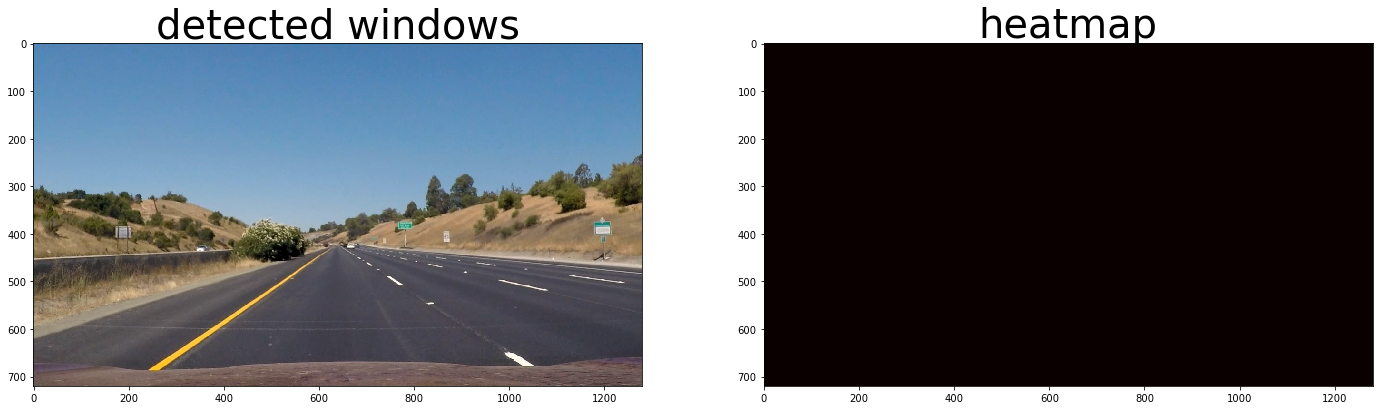

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


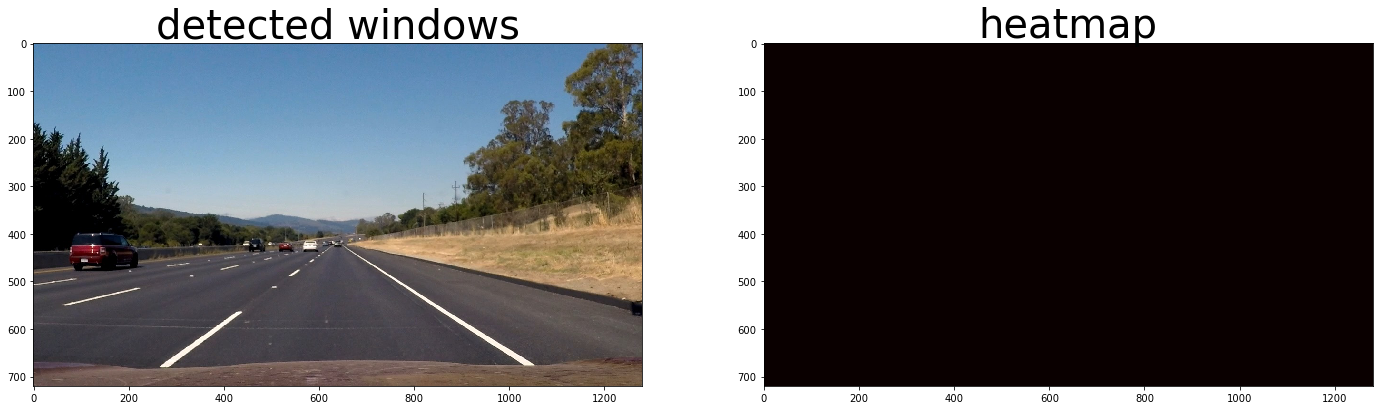

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


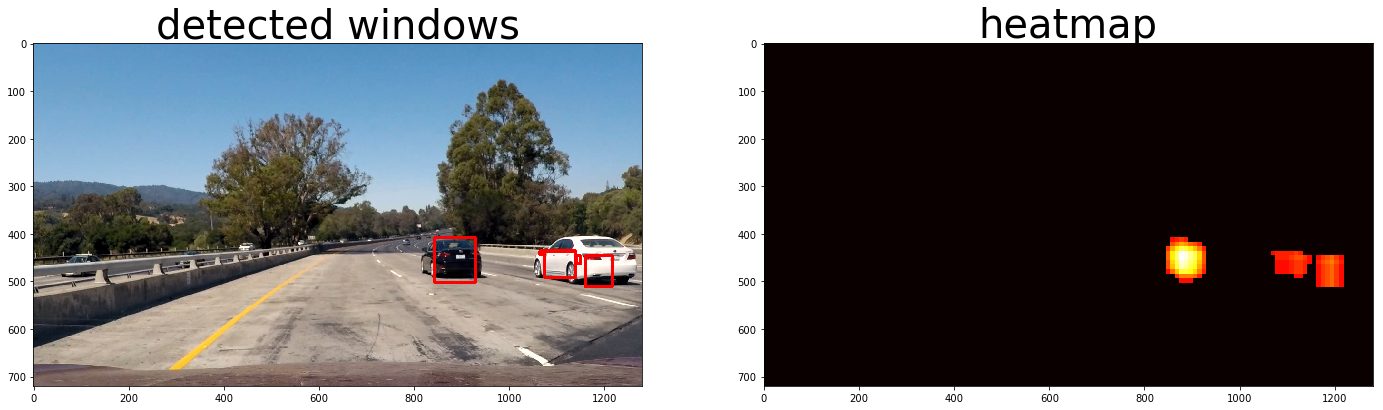

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


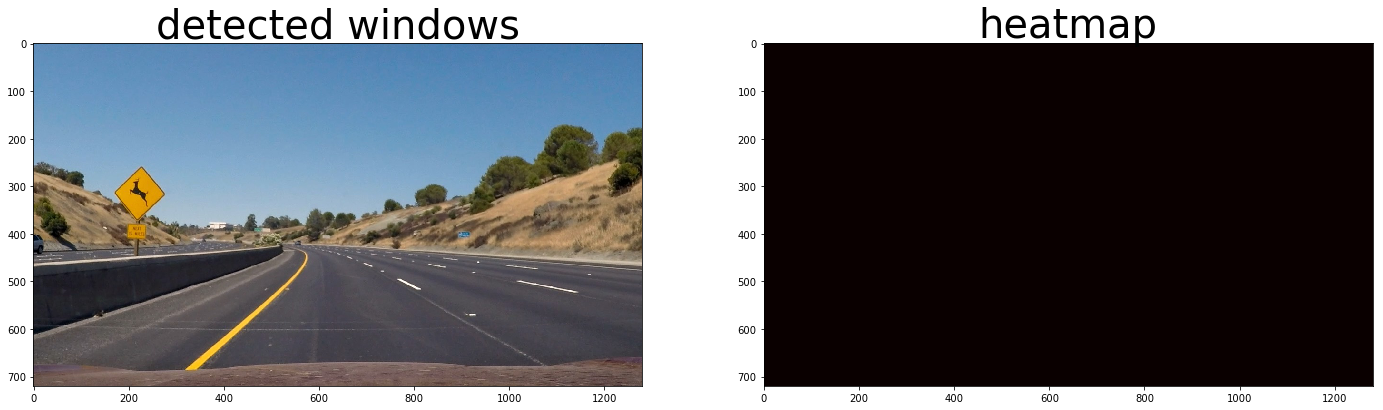

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


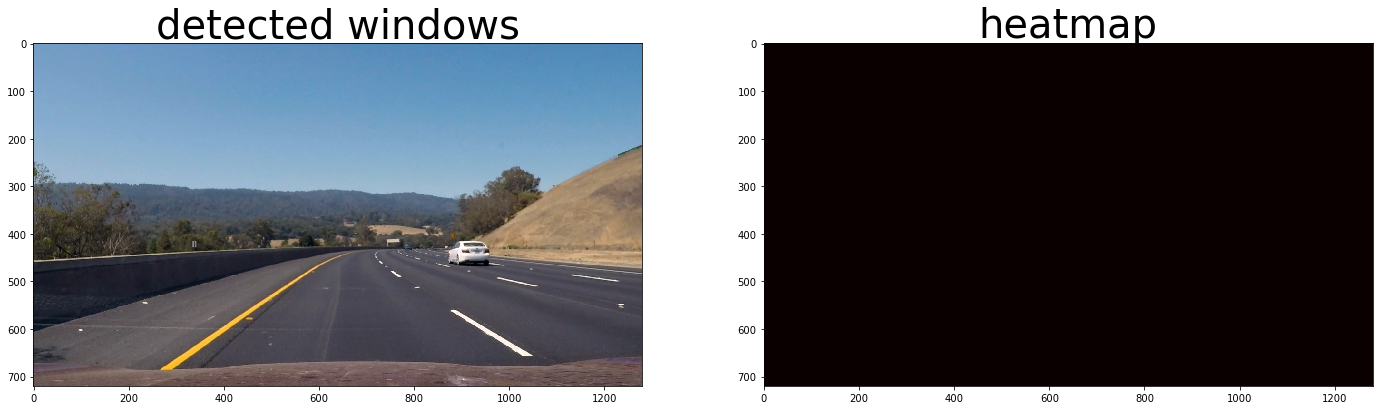

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


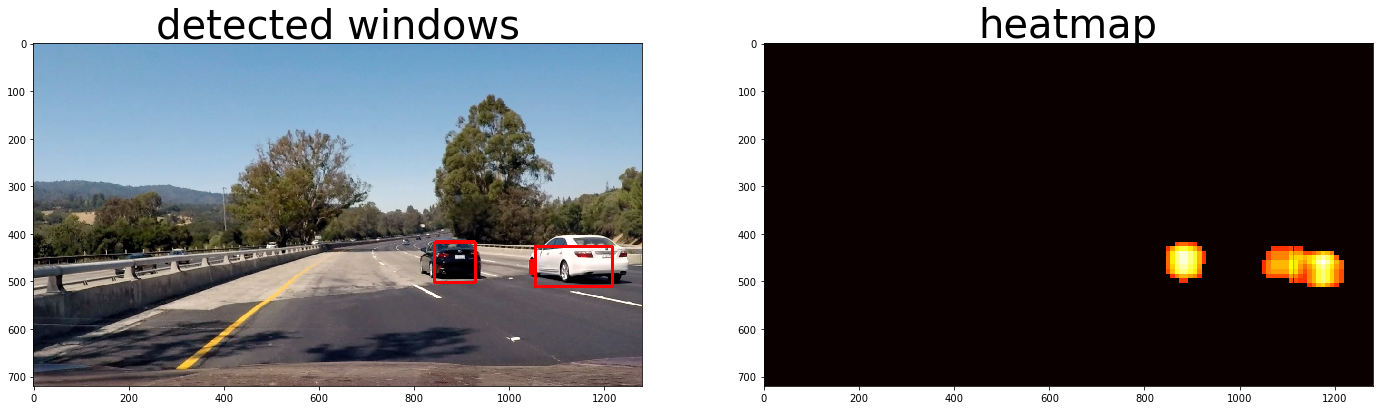

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


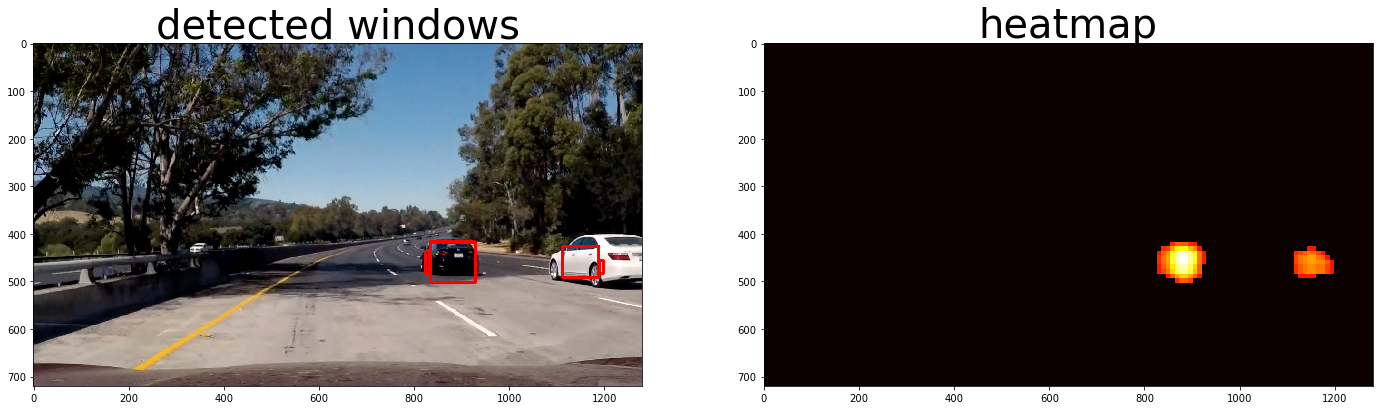

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


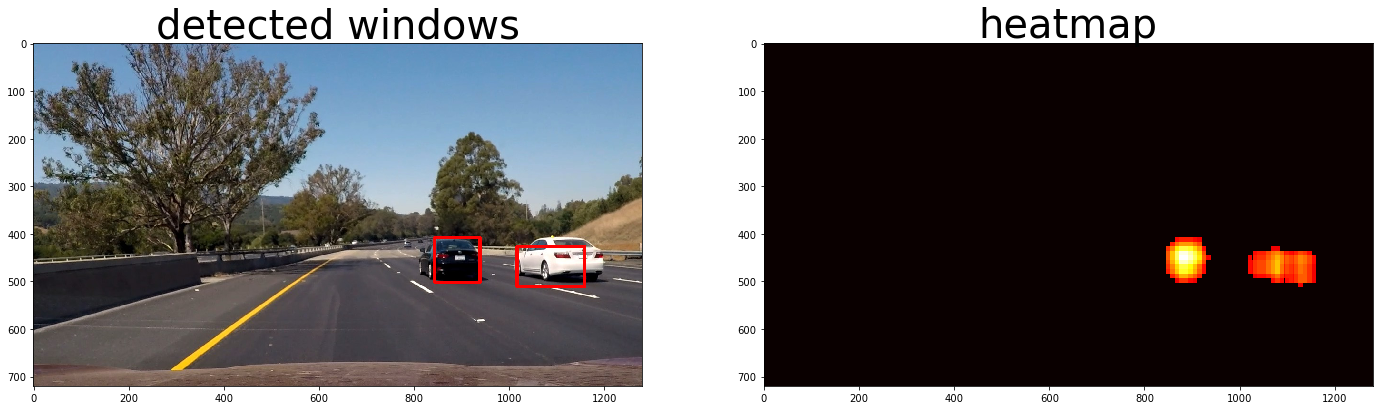

done


In [6]:


# test multiscale window search and heatmap
cspace = "YCrCb"
input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        # When moving function to outside script, had to pass all the arguments
        # Not sure what side effects this caused
        img,heat = test_image(image,cspace,orient,pix_per_cell,cell_per_block,point_scale_data)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(img)
    ax1.set_title('detected windows', fontsize=40)
    ax2.imshow(heat, cmap='hot')
    ax2.set_title('heatmap', fontsize=40)
    plt.show()
print("done")
